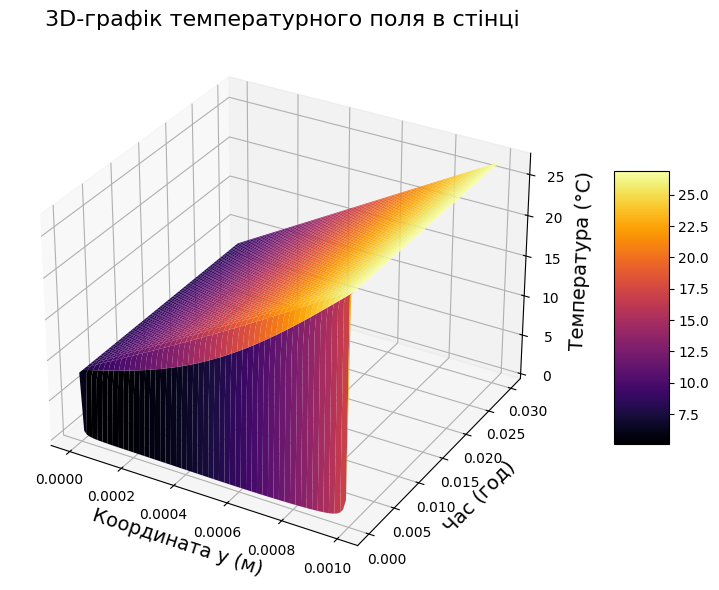

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = 0.09e-6   
L = 0.001          
alpha = 8      
beta = 27         
T_hours = 0.03     
T_seconds = T_hours * 3600

y = np.linspace(0, L, 100)
t = np.linspace(0, T_seconds, 100)
Y, T = np.meshgrid(y, t)

def analytical_solution(y, t, a, L, alpha, beta, terms=200):
    result = np.zeros_like(y)
    for n in range(1, terms + 1):
        coef = (1 / n) * (beta * (-1)**n - alpha)
        result += coef * np.sin(n * np.pi * y / L) * np.exp(-a * (n * np.pi / L)**2 * t)
    return (2 / np.pi) * result + ((beta - alpha) /  L) * y + alpha

U = np.array([
    analytical_solution(y, ti, a, L, alpha, beta)
    for ti in t
])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Y, T / 3600, U, cmap='inferno', edgecolor='none')

ax.set_xlabel("Координата y (м)", fontsize=14)
ax.set_ylabel("Час (год)", fontsize=14)
ax.set_zlabel("Температура (°C)", fontsize=14)
ax.set_title("3D-графік температурного поля в стінці", fontsize=16)

ax.grid(True)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


Максимальна абсолютна похибка (MAE): 21.77552067793462
Середньоквадратична похибка (MSE): 85.62231791264018


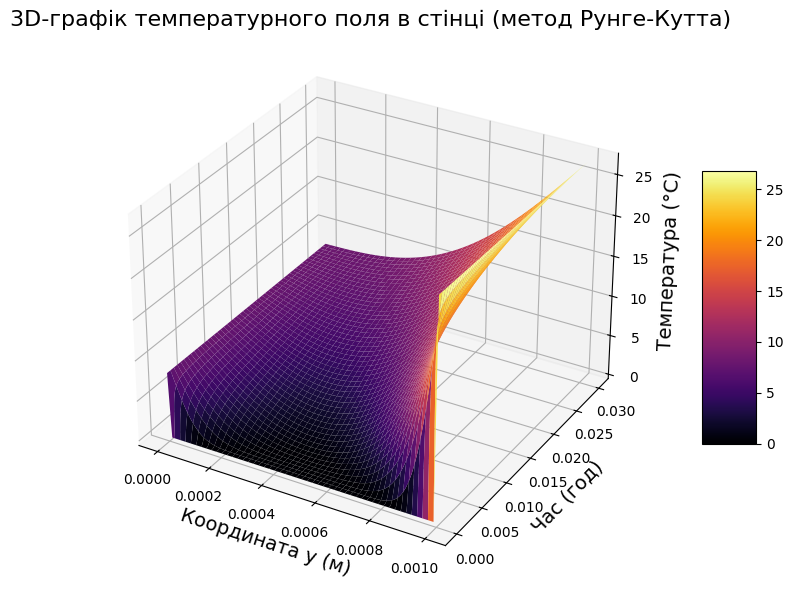

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.09e-6    
L = 0.001       
alpha = 8       
beta = 27       
T_hours = 0.03   
T_seconds = T_hours * 3600
N = 100         
h = 0.03       

y = np.linspace(0, L, N)
t = np.arange(0, T_seconds, h) 

def analytical_solution(y, t, a, L, alpha, beta, terms=200):
    result = np.zeros_like(y)
    for n in range(1, terms + 1):
        coef = (1 / n) * (beta * (-1)**n - alpha)
        result += coef * np.sin(n * np.pi * y / L) * np.exp(-a * (n * np.pi / L)**2 * t)
    return (2 / np.pi) * result + ((beta - alpha) / L) * y + alpha

def runge_kutta_system(y, t, a, L, alpha, beta, N, h):
    U = np.zeros((len(t), N))
    
    U[0, :] = np.zeros(N) 
    
    U[:, 0] = alpha         
    U[:, -1] = beta         
    
    mu = a * h / (y[1] - y[0])**2  
    
    for i in range(1, len(t)):
        k1 = np.zeros(N)
        k2 = np.zeros(N)
        k3 = np.zeros(N)
        k4 = np.zeros(N)
        
        for j in range(1, N-1):
            k1[j] = mu * (U[i-1, j+1] - 2*U[i-1, j] + U[i-1, j-1])
            k2[j] = mu * (U[i-1, j+1] - 2*(U[i-1, j] + 0.5*h * k1[j]) + U[i-1, j-1])
            k3[j] = mu * (U[i-1, j+1] - 2*(U[i-1, j] + 0.5*h * k2[j]) + U[i-1, j-1])
            k4[j] = mu * (U[i-1, j+1] - 2*(U[i-1, j] + h * k3[j]) + U[i-1, j-1])
        
        for j in range(1, N-1):
            U[i, j] = U[i-1, j] + (h / 6) * (k1[j] + 2 * k2[j] + 2 * k3[j] + k4[j])
    
    return U

U_rk = runge_kutta_system(y, t, a, L, alpha, beta, N, h)

U_analytical = np.array([
    analytical_solution(y, ti, a, L, alpha, beta)
    for ti in t
])

MAE = np.max(np.abs(U_analytical - U_rk))

M = len(t) - 1
MSE = np.sum((U_analytical - U_rk)**2) / (M * N)

print(f"Максимальна абсолютна похибка (MAE): {MAE}")
print(f"Середньоквадратична похибка (MSE): {MSE}")

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

Y, T = np.meshgrid(y, t)

surf = ax.plot_surface(Y, T / 3600, U_rk, cmap='inferno', edgecolor='none')

ax.set_xlabel("Координата y (м)", fontsize=14)
ax.set_ylabel("Час (год)", fontsize=14)
ax.set_zlabel("Температура (°C)", fontsize=14)
ax.set_title("3D-графік температурного поля в стінці (метод Рунге-Кутта)", fontsize=16)

ax.grid(True)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()
